# TASK 1


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

In [2]:
#Loading the dataset
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#printing top 5 values & bottom 5 values
print("top 5 values:")
print(df.head(5))
print("bottom 5 values:")
df.tail(5)

top 5 values:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#print the dimensions of the dataset
df.shape

(891, 12)

In [5]:
#Print the number of missing values in each column in the given dataset
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Data Visualization

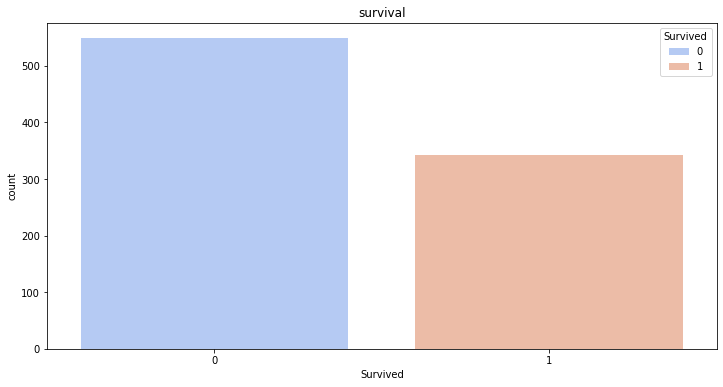

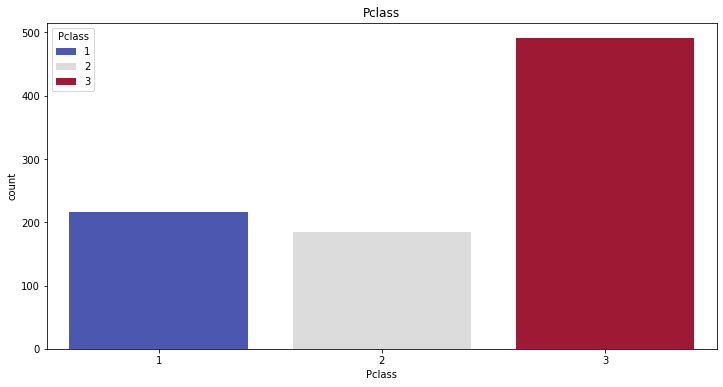

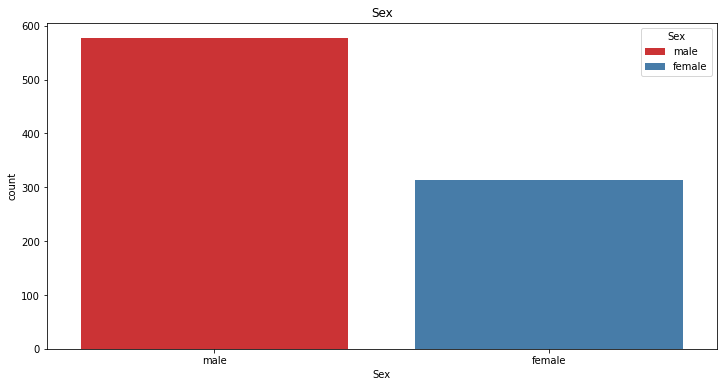

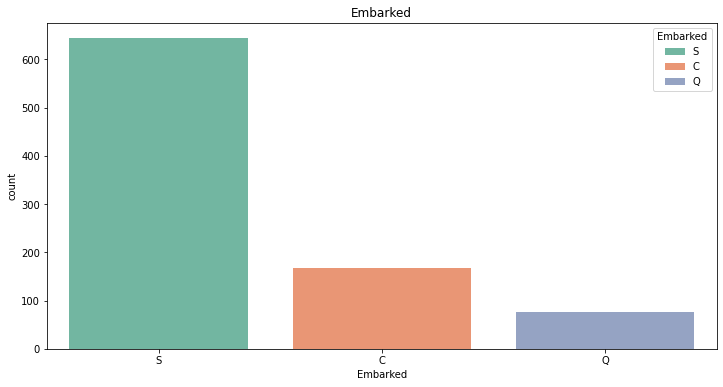

In [6]:
#Barchart of Survived, Pclass, Sex, Embarked
plt.figure(figsize=(12,6))
sns.countplot(x=df['Survived'],hue=df['Survived'],legend=True,palette="coolwarm")
plt.title("survival")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x=df['Pclass'],hue=df['Pclass'],palette="coolwarm",legend=True)
plt.title("Pclass")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x=df['Sex'],hue=df['Sex'],legend=True,palette="Set1")
plt.title("Sex")
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x=df['Embarked'],hue=df["Embarked"],legend=True,palette="Set2")
plt.title("Embarked")
plt.show()

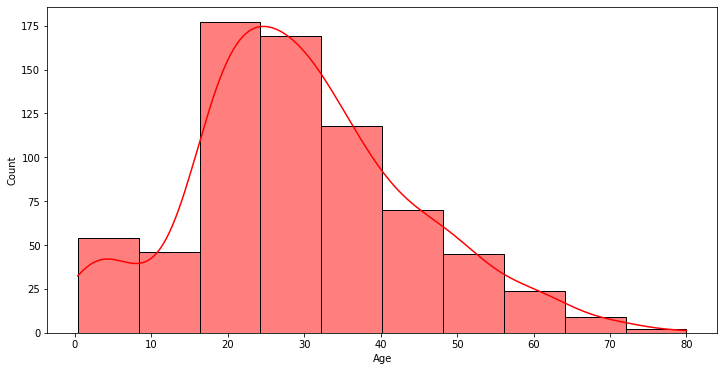

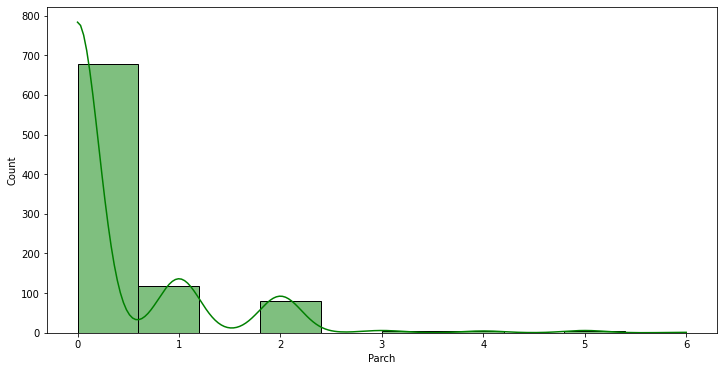

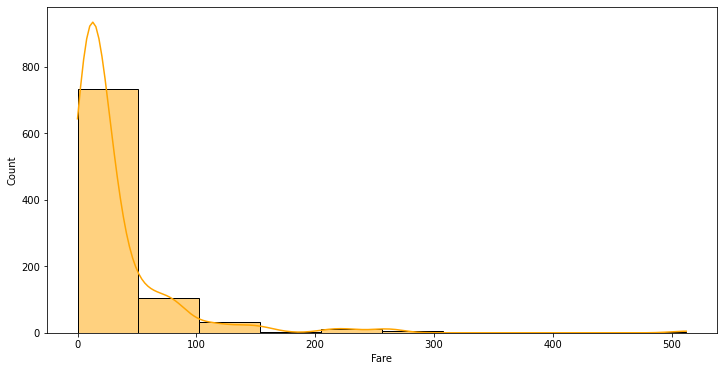

In [7]:
#Histogram of Age, Parch, Fare
column=['Age','Parch','Fare']
color=['red','green','orange']
for c,col in zip(color,column):
    plt.figure(figsize=(12,6))
    sns.histplot(df[col].dropna(),bins=10,kde=True,color=c)
    plt.show()

# Handling missing values

In [8]:
#dropping columns PassengerId,Name,Ticket,Cabin
df_clean = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [9]:
#filling the missing values of Age column with median
df_clean["Age"].fillna(df_clean["Age"].median(), inplace=True)

In [10]:
#filling the missing values of Embarked with mode
df_clean["Embarked"].fillna(df_clean["Embarked"].mode()[0], inplace=True)


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
#performing label encoding to transform Sex,Embarked columns
df_clean["Sex"] = LabelEncoder().fit_transform(df_clean["Sex"])
df_clean["Embarked"] = LabelEncoder().fit_transform(df_clean["Embarked"])
df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


# Model Building

In [13]:
#prepare X and Y
X=df_clean.drop(columns="Survived")
y=df_clean['Survived']

In [14]:
#splitting the dataset into x_train,x_test,y_train,y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [15]:
#printing shape of the train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


In [16]:
# Create the model
model=DecisionTreeClassifier(criterion="entropy",random_state=42)

In [17]:
# Fitting the decision tree with default hyperparameters
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# visualization of tree

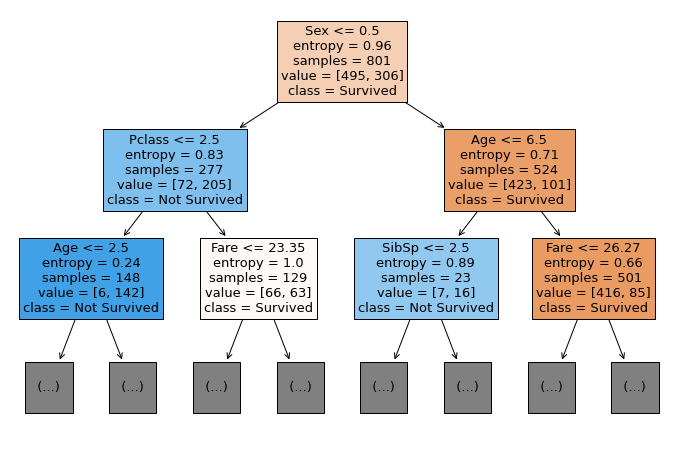

In [18]:
#printing the tree
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model,feature_names=X.columns,class_names=['Survived','Not Survived'],filled=True,precision=2,fontsize=13,max_depth=2)
plt.show()

In [19]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion matrix:",confusion_matrix(y_test,y_pred))
print("Classification_report:",classification_report(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))


Accuracy: 0.7777777777777778
Confusion matrix: [[41 13]
 [ 7 29]]
Classification_report:               precision    recall  f1-score   support

           0       0.85      0.76      0.80        54
           1       0.69      0.81      0.74        36

    accuracy                           0.78        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.79      0.78      0.78        90

Precision: 0.6904761904761905
Recall 0.8055555555555556
F1 Score: 0.7435897435897436
